,mean radius,mean texture,mean perimeter
0,17.99,10.38,122.80
1,20.57,17.77,132.90
2,19.69,21.25,130.00
3,11.42,20.38,77.58
4,20.29,14.34,135.10


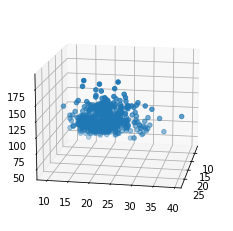

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]
X_pca shape:(569, 2)
Explained variance ratio:[0.443, 0.19]



,0,1,target
0,9.192837,1.948583,0
1,2.387802,-3.768172,0
2,5.733896,-1.075174,0
3,7.122953,10.275589,0
4,3.935302,-1.948072,0


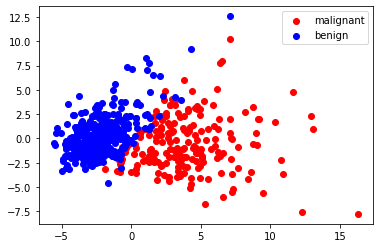

In [117]:
#AI-TECHGYM-1-6-Q-1
#教師なし学習 PCA

#実行フォルダ
import os
os.chdir(r"C:\Users\tsuchida\Documents\techgym_セミナー\TortoiseGit_resorce\techgym_ai\Chapter_1\Answer_sheet\AI_Chapter1_saved_files")

#データ加工・処理・分析ライブラリ
import pandas as pd

#可視化ライブラリ
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

#インポート
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#乳がんデータを読み込むためのインポート
from sklearn.datasets import load_breast_cancer

#乳がんデータの取得
cancer = load_breast_cancer()

ls_data = []
ls_columns = []
for i in range(3):
  ls_data.append(cancer.data[:,i])
  ls_columns.append(cancer.feature_names[i])

ls_data_T = [list(x) for x in zip(*ls_data)]

df_cancer = pd.DataFrame(ls_data_T)
df_cancer.columns = ls_columns

display(df_cancer.head())

x = df_cancer.iloc[:,0]
y = df_cancer.iloc[:,1]
z = df_cancer.iloc[:,2]
# Axes3Dオブジェクトの生成
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.view_init(elev=15, azim=10)
# 各種描画処理
# ax.set_xlim3d(0, 3)
# ax.set_ylim3d(0, 3)
# ax.set_zlim3d(0, 3)
ax.scatter(x, y, z)

# プロットの表示
plt.show()

# 標準化
sc = StandardScaler()
X_std = sc.fit_transform(cancer.data)
print(X_std)

# 主成分分析
pca = PCA(n_components=2)
pca.fit(X_std)
X_pca = pca.transform(X_std)

EVR = pca.explained_variance_ratio_
x = float(format(EVR[0], '.3f'))
y = float(format(EVR[1], '.3f'))

print('X_pca shape:{}'.format(X_pca.shape))
print('Explained variance ratio:{}'.format([x,y]))

print()

df_pca = pd.DataFrame(X_pca)
df_pca['target'] = cancer.target

display(df_pca.head())

df0 = df_pca[df_pca.target == 0]
df1 = df_pca[df_pca.target == 1]

plt.scatter(df0[0], df0[1], label='malignant', color='red')
plt.scatter(df1[0], df1[1], label='benign', color='blue')

plt.legend(loc='upper right')

In [111]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [113]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [87]:
l = np.array([10, 20, 30, 40, 50])
l = l.reshape(-1,1)
print(l)

sc = StandardScaler()
sc.fit(l)
sc.transform(l)

[[10]
 [20]
 [30]
 [40]
 [50]]


array([[-1.41421356],
       [-0.70710678],
       [ 0.        ],
       [ 0.70710678],
       [ 1.41421356]])

In [89]:
sc = StandardScaler()
X_std = sc.fit_transform(cancer.data[:,0].reshape(-1,1))
print(X_std[:5])

[[ 1.09706398]
 [ 1.82982061]
 [ 1.57988811]
 [-0.76890929]
 [ 1.75029663]]


In [90]:
sc = StandardScaler()
X_std = sc.fit_transform(cancer.data)
print(X_std[:5])

[[ 1.09706398e+00 -2.07333501e+00  1.26993369e+00  9.84374905e-01
   1.56846633e+00  3.28351467e+00  2.65287398e+00  2.53247522e+00
   2.21751501e+00  2.25574689e+00  2.48973393e+00 -5.65265059e-01
   2.83303087e+00  2.48757756e+00 -2.14001647e-01  1.31686157e+00
   7.24026158e-01  6.60819941e-01  1.14875667e+00  9.07083081e-01
   1.88668963e+00 -1.35929347e+00  2.30360062e+00  2.00123749e+00
   1.30768627e+00  2.61666502e+00  2.10952635e+00  2.29607613e+00
   2.75062224e+00  1.93701461e+00]
 [ 1.82982061e+00 -3.53632408e-01  1.68595471e+00  1.90870825e+00
  -8.26962447e-01 -4.87071673e-01 -2.38458552e-02  5.48144156e-01
   1.39236330e-03 -8.68652457e-01  4.99254601e-01 -8.76243603e-01
   2.63326966e-01  7.42401948e-01 -6.05350847e-01 -6.92926270e-01
  -4.40780058e-01  2.60162067e-01 -8.05450380e-01 -9.94437403e-02
   1.80592744e+00 -3.69203222e-01  1.53512599e+00  1.89048899e+00
  -3.75611957e-01 -4.30444219e-01 -1.46748968e-01  1.08708430e+00
  -2.43889668e-01  2.81189987e-01]
 [ 1.5

In [49]:
#AI-TECHGYM-1-4-A-3
#教師なし学習 k-mean法

# データ加工・処理・分析ライブラリ
import pandas as pd
from pandas import Series, DataFrame

# 可視化ライブラリ
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# k-means法を使うためのインポート
from sklearn.cluster import KMeans

# データがあるurl の指定
file_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv'

# データを取得して展開する
#対象データを読み込み
shoppers= pd.read_csv(file_url)

# データの列の絞り込み
shoppers_sub = shoppers[['Administrative_Duration','Informational_Duration','ProductRelated_Duration','Region','SpecialDay']]

# KMeansクラスの初期化
kmeans = KMeans(init='random', n_clusters=6, random_state=0)

# クラスターの重心を計算
kmeans.fit(shoppers_sub)

# クラスター番号をpandasのSeriesオブジェクトに変換
labels = pd.Series(kmeans.labels_, name='cluster_number')

# 金融機関のデータにクラスター番号のデータを結合
shoppers_with_cluster = pd.concat([shoppers, labels], axis=1)

# 分割のための区切りを設定
bins = [0,0.2,0.4,0.6,0.8,1]

# 上の区切りをもとに金融機関のデータを分割し、qcut_age変数に各データの年齢層を設定
qcut_sp = pd.cut(shoppers_with_cluster.SpecialDay, bins, right=False)

# クラスタ番号と年齢層を結合
df = pd.concat([shoppers_with_cluster.cluster_number, qcut_sp], axis=1)

# クラスタ番号と年齢層を軸に集計し、年齢層を列に設定
cross_cluster_sp = df.groupby(['cluster_number', 'SpecialDay']).size().unstack().fillna(0)
display(cross_cluster_sp)

# 分割のための区切りを設定
bins_2 = [1,2,3,4,5,6,7,8,9]

# 上の区切りをもとに金融機関のデータを分割し、qcut_age変数に各データの年齢層を設定
qcut_r = pd.cut(shoppers_with_cluster.Region, bins_2, right=False, labels=[1,2,3,4,5,6,7,8])

# クラスタ番号と年齢層を結合
df = pd.concat([shoppers_with_cluster.cluster_number, qcut_r], axis=1)

# クラスタ番号と年齢層を軸に集計し、年齢層を列に設定
cross_cluster_r = df.groupby(['cluster_number', 'Region']).size().unstack().fillna(0)
display(cross_cluster_r)


SpecialDay,"[0.0, 0.2)","[0.2, 0.4)","[0.4, 0.6)","[0.6, 0.8)","[0.8, 1.0)"
cluster_number,,,,,
0,386,6,7,2,15
1,10,0,0,0,0
2,1096,9,28,26,20
3,2807,49,48,83,71
4,6657,114,159,240,218
5,123,0,1,0,1


Region,1,2,3,4,5,6,7,8
cluster_number,,,,,,,,
0,181,39,83,35,12,25,17,15
1,8,0,1,1,0,0,0,0
2,464,119,239,110,27,64,78,39
3,1145,302,616,302,79,212,207,120
4,2912,667,1444,727,196,500,453,260
5,70,9,20,7,4,4,6,0
